# REGRESYON ANALİZİ

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


ho : regresyon modeli anlamlıdır
h1 : regresyon modeli anlamsızdır

In [6]:
data=pd.read_excel("reg.xlsx")
data.head()

,mat,mezuniyet,system,yazılım,kredi
0,2548,130,mpfi,111,27
1,2548,130,mpfi,111,27
2,2823,152,mpfi,154,26
3,2337,109,mpfi,102,30
4,2824,136,mpfi,115,22


In [7]:
data.describe()

,mat,mezuniyet,yazılım,kredi
count,205.000000,205.000000,205.000000,205.000000
mean,2555.565854,126.907317,104.117073,30.751220
std,520.680204,41.642693,39.544167,6.886443
min,1488.000000,61.000000,48.000000,16.000000
25%,2145.000000,97.000000,70.000000,25.000000
50%,2414.000000,120.000000,95.000000,30.000000
75%,2935.000000,141.000000,116.000000,34.000000
max,4066.000000,326.000000,288.000000,54.000000


In [8]:
y=data["mezuniyet"]
x=data["yazılım"]

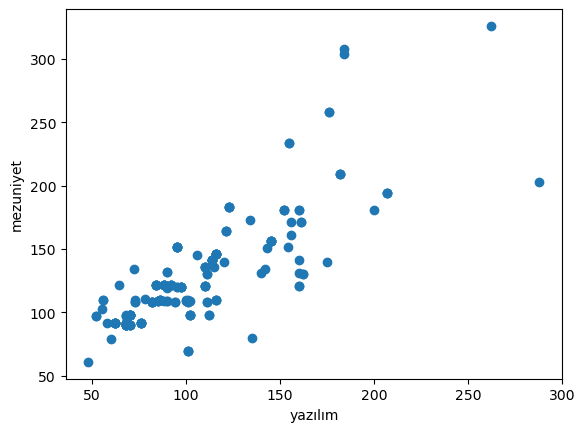

In [9]:
plt.scatter(x,y)
plt.xlabel("yazılım")
plt.ylabel("mezuniyet")
plt.show()

In [10]:
x=sm.add_constant(x)
x.head()

,const,yazılım
0,1.0,111
1,1.0,111
2,1.0,154
3,1.0,102
4,1.0,115


In [12]:
result=sm.OLS(y,x).fit()   #sm.OLS ile regresyon yapılıyor
result.summary2() #MODEL ANLAMLI OLDUĞU İÇİN H0 KABUL DERİZ (HİPOTEZ)
#Prob (F-statistic):	6.82e-49 kısmı sonuç kısmı. 0.05 e göre hesaplanır

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.654    
Dependent Variable: mezuniyet        AIC:                1895.1093
Date:               2023-11-22 10:43 BIC:                1901.7554
No. Observations:   205              Log-Likelihood:     -945.55  
Df Model:           1                F-statistic:        386.6    
Df Residuals:       203              Prob (F-statistic): 6.82e-49 
R-squared:          0.656            Scale:              599.95   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      38.1224     4.8285    7.8953   0.0000   28.6020   47.6428
yazılım     0.8527     0.0434   19.6633   0.0000    0.7672    0.9382
------------------------------------------------------------------
Omnibus:              47.334       Durbin-Watson:          0.991  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       218.911
Skew:                 0.779        Prob(JB):               0.000  
Kurtosis:             7.817        Condition No.:          314    
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

# BUSE ERDOĞAN

In [16]:
autos = pd.read_csv("arabafiyat.csv", sep=",", encoding="latin-1")
df=autos.copy()
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [30]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.triu(correlation_matrix, k=1))
plt.show()


ValueError: could not convert string to float: 'alfa-romero giulia'

In [23]:
threshold = 0.6
numerical_columns=correlation_matrix.loc[(correlation_matrix["price"].abs()> thresold)].index.tolist()
numerical_columns

NameError: name 'correlation_matrix' is not defined

NameError: name 'numerical_columns' is not defined

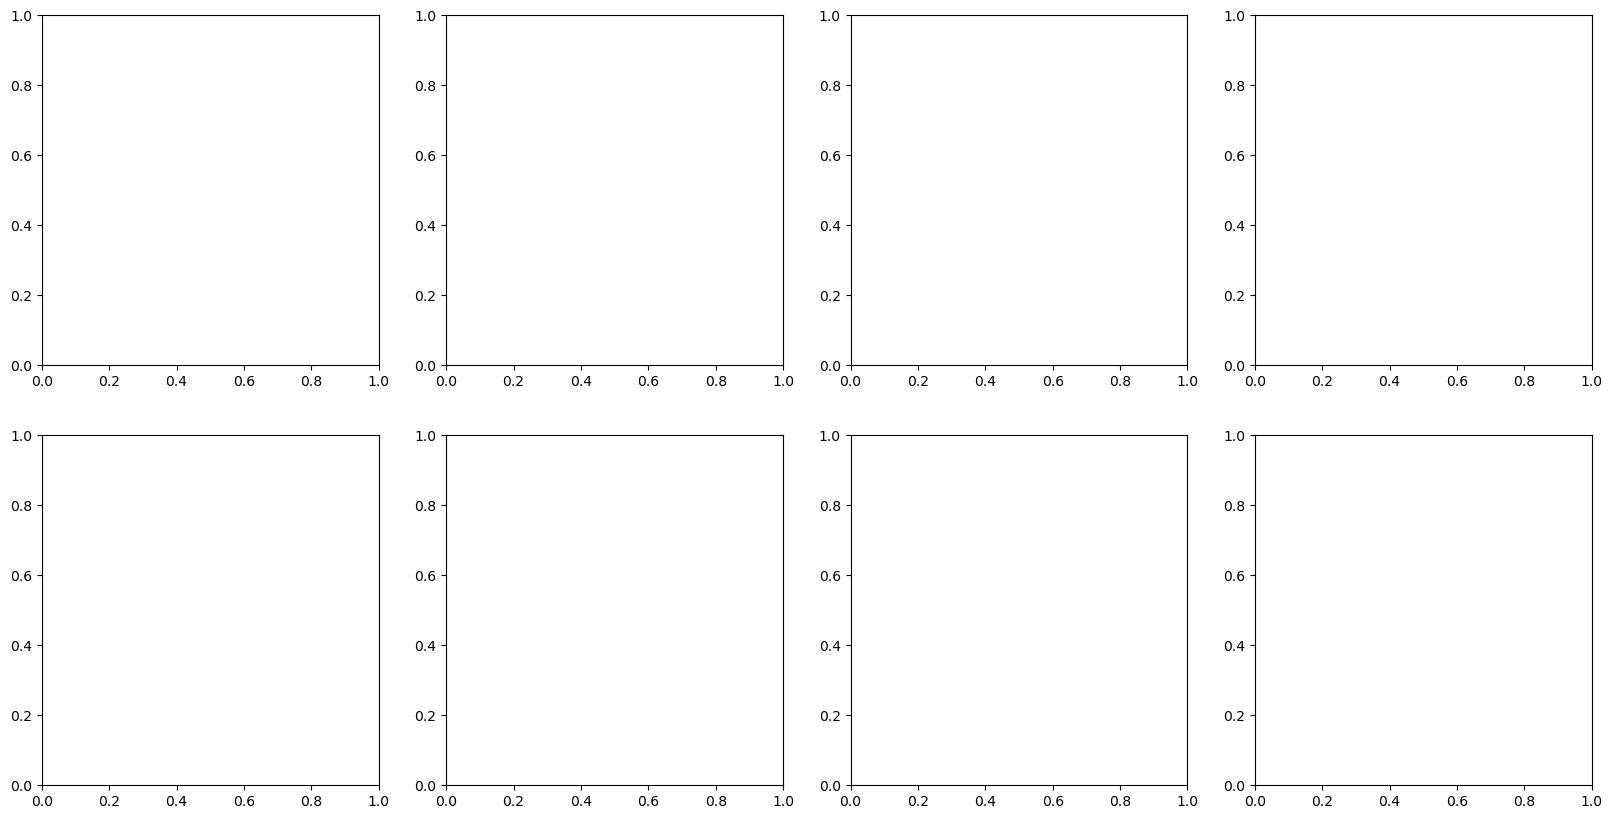

In [27]:
sns.set_palette("cool")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], alpha=0.5, color="blue")
    axes[i].set_title(f"{col} vs price", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Price", fontsize=10)
    axes[i].tick_params(axis="both", labelsize=8)
plt.tight_layout()
plt.show()

In [31]:
labels = numerical_columns.copy() + categorical=columns.copy()
df_use = df[labels]
df_use

SyntaxError: cannot assign to expression (1845985202.py, line 1)

In [ ]:
#aykırı değere boxplottan bakıyoruz